In [1]:
import cv2

In [2]:
img = cv2.imread('11.png')

In [3]:
img.shape

(388, 388, 3)

In [4]:
img[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [5]:
import matplotlib.pyplot as plt

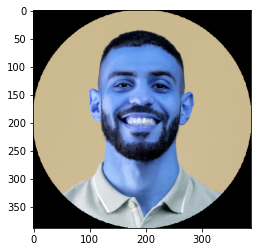

In [6]:
plt.imshow(img)

In [7]:
while True:
    cv2.imshow('result',img)
    if cv2.waitKey(2)==27:
        break
cv2.destroyAllWindows()

In [8]:
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [9]:
haar_data.detectMultiScale(img)

array([[ 98,  56, 189, 189]])

In [24]:
while True:
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,255),4)
    cv2.imshow('result',img)
    if cv2.waitKey(2)==27:
        break
cv2.destroyAllWindows()

In [25]:
#Face Mask Detection

In [42]:
capture = cv2.VideoCapture(0)
data = []
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,255),4)
            face = img[y:y+h,x:x+w,:]
            face = cv2.resize(face,(50,50))
#             print(len(data))
            if len(data) < 200:
                data.append(face)
        cv2.imshow('result',img)
    if cv2.waitKey(2)==27 or len(data) >=200:
        break
capture.release()
cv2.destroyAllWindows()

In [43]:
import numpy as np
np.save('without_mask.npy',data)

In [44]:
np.save('with_mask.npy',data)

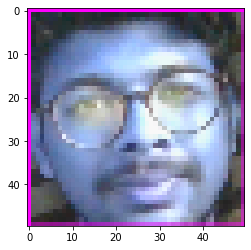

In [45]:
plt.imshow(data[0])